In [1]:
import pandas as pd
import glob

# Step 1: List all CSV files in the folder
csv_files = glob.glob(r'C:\Users\arjun\Downloads\Hist_stock\*.csv')

# Bank names for each file
bank_names = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

# Step 2: Read and combine CSVs, while adding a column for the bank name
df_list = []

for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    df['Bank Name'] = bank_names[i]  # Add the bank name column
    df_list.append(df)

# Step 3: Concatenate all data into one DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Step 4: Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_banks_stock_prices.csv', index=False)

print("CSV files have been combined and saved as 'combined_banks_stock_prices.csv'.")


CSV files have been combined and saved as 'combined_banks_stock_prices.csv'.


### Creating DataFrame

In [2]:
sdata=pd.read_csv('combined_banks_stock_prices.csv')
sdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Bank Name
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,34.811729,16296700,BAC
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,34.442013,17757900,BAC
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,34.486385,14970700,BAC
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,34.434616,12599800,BAC
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,34.456806,15619400,BAC


### Data Cleaning

In [3]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21138 entries, 0 to 21137
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       21138 non-null  object 
 1   Open       21138 non-null  float64
 2   High       21138 non-null  float64
 3   Low        21138 non-null  float64
 4   Close      21138 non-null  float64
 5   Adj Close  21138 non-null  float64
 6   Volume     21138 non-null  int64  
 7   Bank Name  21138 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.3+ MB


In [4]:
sdata['Date'] = pd.to_datetime(sdata['Date'])
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21138 entries, 0 to 21137
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       21138 non-null  datetime64[ns]
 1   Open       21138 non-null  float64       
 2   High       21138 non-null  float64       
 3   Low        21138 non-null  float64       
 4   Close      21138 non-null  float64       
 5   Adj Close  21138 non-null  float64       
 6   Volume     21138 non-null  int64         
 7   Bank Name  21138 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.3+ MB


### Data Visualization

### Volume By company Tinker /Bar Plot

In [5]:
bar=sdata.groupby('Bank Name')['Volume'].sum().reset_index()
bar



,Bank Name,Volume
0,BAC,413881987700
1,C,89268155300
2,GS,23156943100
3,JPM,92130471800
4,MS,55456720100
5,WFC,103857612700


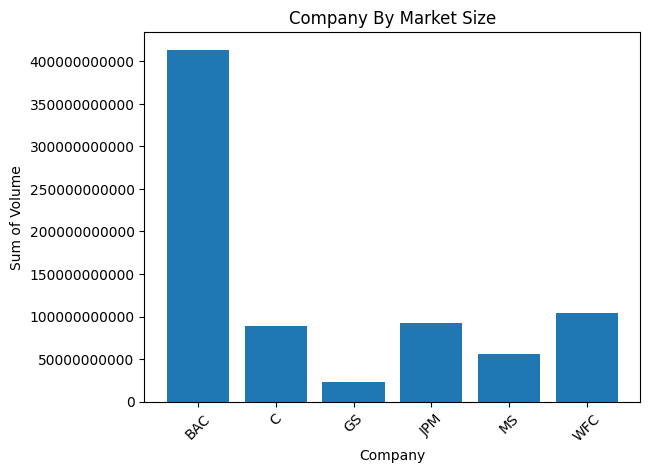

In [6]:
import matplotlib.pyplot as plt
plt.bar(bar['Bank Name'],bar['Volume'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Company')
plt.ylabel('Sum of Volume')
plt.title('Company By Market Size')
plt.show()

### Closing Price Over Year /Line Plot

In [7]:
sdata['year']=sdata['Date'].dt.year
line=sdata.groupby('year')['Close'].sum().reset_index()
line

,year,Close
0,2006,211773.329875
1,2007,224199.769818
2,2008,120886.420045
3,2009,69489.699998
4,2010,76998.889982
5,2011,67360.110098
6,2012,60019.719969
7,2013,84692.240018
8,2014,96047.889993
9,2015,105161.030031


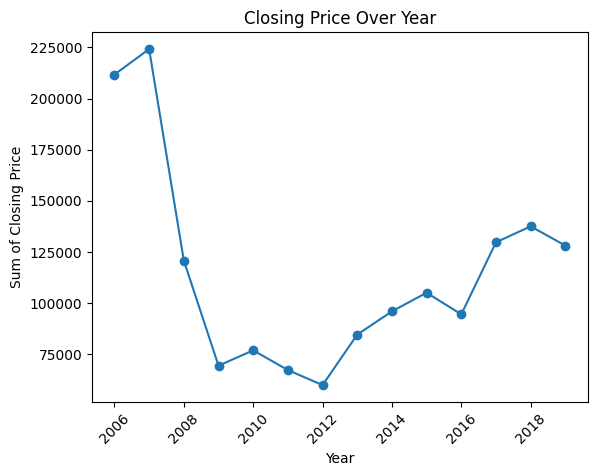

In [8]:
plt.plot(line['year'],line['Close'],marker='o')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Year')
plt.ylabel('Sum of Closing Price')
plt.title('Closing Price Over Year')
plt.show()

### Distributions/Sub Plot

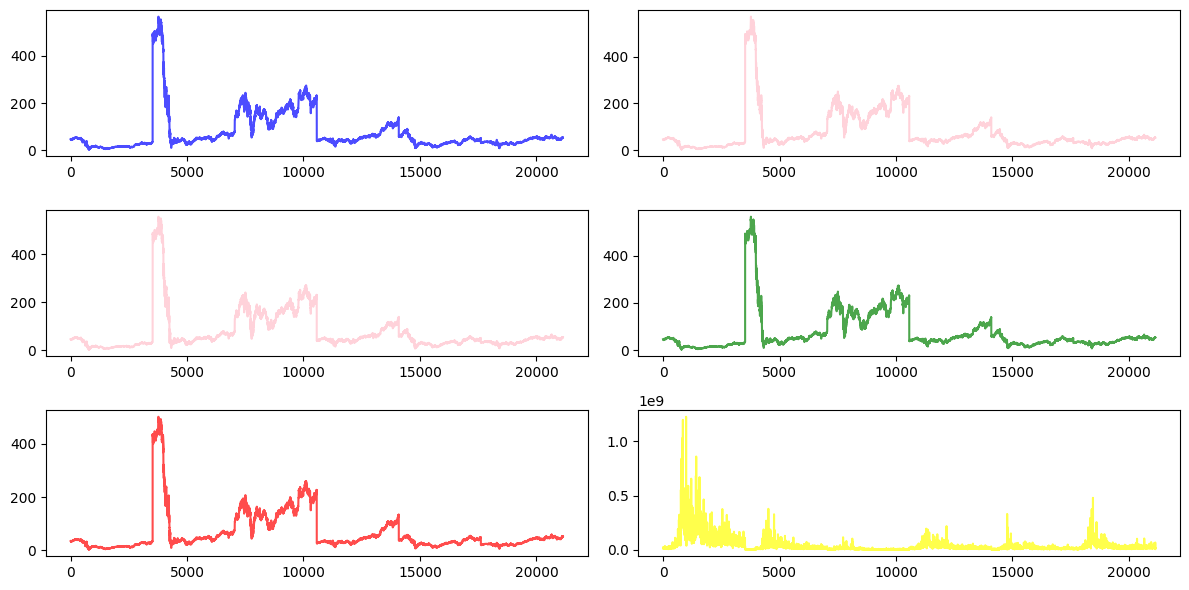

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12, 6))  # 1 row, 2 columns

# First subplot: Histogram for 'Open'
axes[0,0].plot(sdata['Open'], color='blue', alpha=0.7)


# Second subplot: Line plot for 'Close'
axes[0,1].plot(sdata['High'], color='pink', alpha=0.7)
axes[1,0].plot(sdata['Low'], color='pink', alpha=0.7)
axes[1,1].plot(sdata['Close'],color='green', alpha=0.7)
axes[2,0].plot(sdata['Adj Close'],color='red', alpha=0.7)
axes[2,1].plot(sdata['Volume'],color='yellow', alpha=0.7)


# Adjust layout for better visualization
plt.tight_layout()
plt.show()


### Scatter Plot

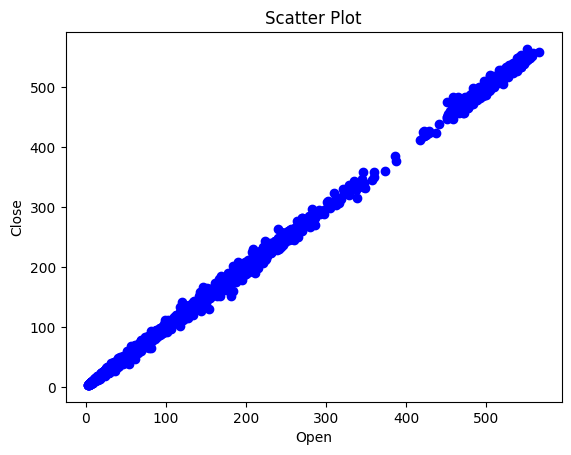

In [18]:
plt.scatter(sdata['Open'],sdata['Close'], color='blue', label='Variable 1')
plt.title('Scatter Plot')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

### Pie Chart

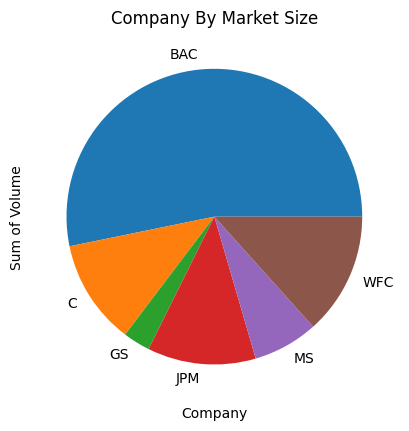

In [19]:
plt.pie(bar['Volume'],labels=bar['Bank Name'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Company')
plt.ylabel('Sum of Volume')
plt.title('Company By Market Size')
plt.show()

### Heat Map

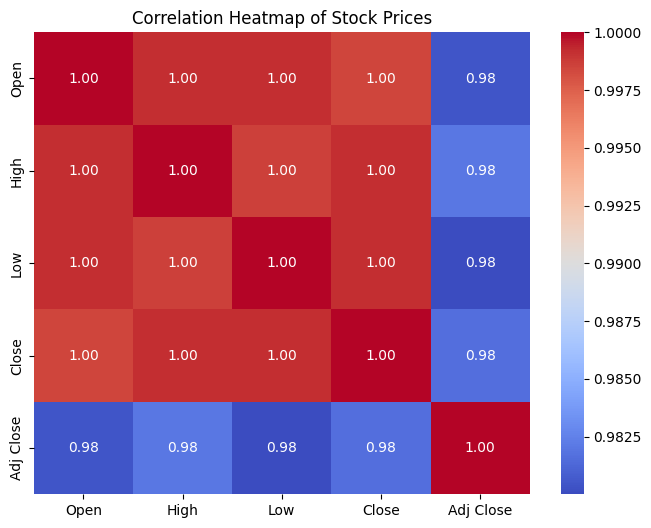

In [21]:
import seaborn as sns

# Calculate the correlation matrix
correlation = df[['Open', 'High', 'Low', 'Close', 'Adj Close']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Stock Prices')
plt.show()



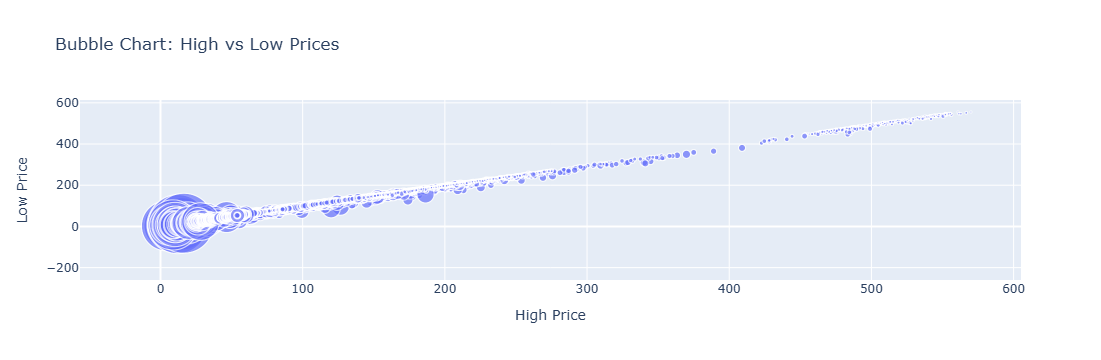

In [36]:

import plotly.express as px 
fig = px.scatter(sdata, x="High", y="Low", size="Volume", size_max=60,
                 title="Bubble Chart: High vs Low Prices",
                 labels={"High": "High Price", "Low": "Low Price", "Volume": "Trading Volume"})


fig.show()



### Tree Plot

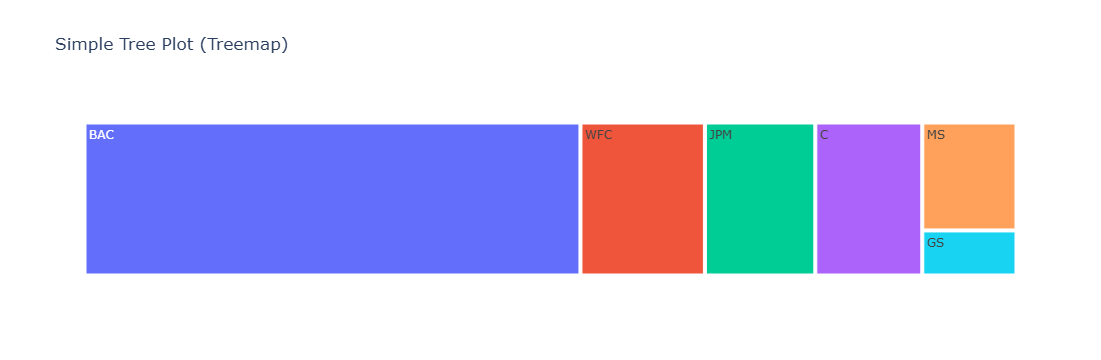

In [37]:
fig = px.treemap(bar, path=['Bank Name'], values='Volume', 
                 title="Simple Tree Plot (Treemap)")

# Show the plot
fig.show()

### Violin Plot

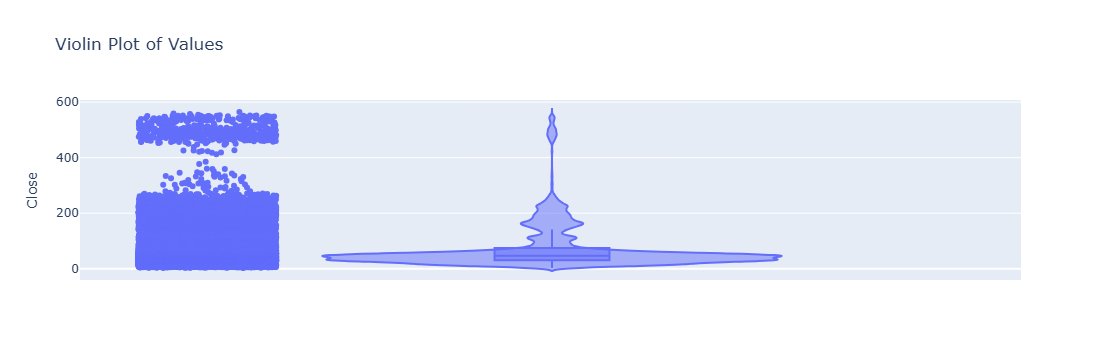

In [38]:
fig = px.violin(sdata, y="Close", box=True, points="all", title="Violin Plot of Values")

# Show the plot
fig.show()